# Importing Libraries.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [154]:
# Load dataset
df = pd.read_csv('System Data.csv')
df.head()


,Timestamp,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others
0,10/10/2024 12:46,25-34,Male,"<450,000",Central,Daily,"<50,000",Electronics,Cash on Delivery,No,Rarely,3,2,Convenience,"Smart phones, Laptops",Public Wi-Fi,Yes
1,10/10/2024 14:56,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Cash on Delivery,No,Rarely,5,3,Product variety,Smart phones,Home Wi-Fi,No
2,10/10/2024 15:01,25-34,Male,">2,000,000",Western,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Rarely,3,3,Price,Smart phones,Mobile data,Yes
3,10/10/2024 15:03,35-44,Male,"450,000-1,000,000",Central,A few times a year,"<50,000",Health & Beauty,Cash on Delivery,No,Rarely,1,3,Price,Smart phones,Mobile data,Yes
4,10/10/2024 15:04,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Occassionally,3,3,Convenience,Smart phones,Mobile data,Yes


# Data Cleaning

In [157]:
# Strip spaces from column names again
df.columns = df.columns.str.strip()

# Drop the Timestamp column explicitly
if 'Timestamp' in df.columns:
    df_cleaned = df.drop(columns=['Timestamp'])
else:
    df_cleaned = df.copy()

# Verify the columns after dropping Timestamp
df_cleaned.columns


Index(['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping',
       'Average spending', 'Categories', 'Means of Payment',
       'Entrolled on Jumia Prime or any loyalty program',
       'Frequency of shopping', 'Rate of Satisfaction',
       'Rate of availability of products', 'Reason for your purchase',
       'Device to shop', 'Internet connection used',
       'Recommendation to others'],
      dtype='object')

In [159]:
# Ensure column names are stripped of whitespace
df.columns = df.columns.str.strip()

# Drop Timestamp column if it exists
if 'Timestamp' in df.columns:
    df = df.drop(columns=['Timestamp'])

# Verify that Timestamp is removed
print(df.head())

     Age Gender     Monthly Income    Region Frequency of Shopping  \
0  25-34   Male           <450,000   Central                 Daily   
1  25-34   Male  450,000-1,000,000  Northern    A few times a year   
2  25-34   Male         >2,000,000   Western    A few times a year   
3  35-44   Male  450,000-1,000,000   Central    A few times a year   
4  25-34   Male  450,000-1,000,000  Northern    A few times a year   

  Average spending       Categories  Means of Payment  \
0          <50,000      Electronics  Cash on Delivery   
1   50,000-100,000      Electronics  Cash on Delivery   
2   50,000-100,000      Electronics      Mobile Money   
3          <50,000  Health & Beauty  Cash on Delivery   
4   50,000-100,000      Electronics      Mobile Money   

  Entrolled on Jumia Prime or any loyalty program Frequency of shopping  \
0                                              No                Rarely   
1                                              No                Rarely   
2          

In [160]:
df.head()

,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others
0,25-34,Male,"<450,000",Central,Daily,"<50,000",Electronics,Cash on Delivery,No,Rarely,3,2,Convenience,"Smart phones, Laptops",Public Wi-Fi,Yes
1,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Cash on Delivery,No,Rarely,5,3,Product variety,Smart phones,Home Wi-Fi,No
2,25-34,Male,">2,000,000",Western,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Rarely,3,3,Price,Smart phones,Mobile data,Yes
3,35-44,Male,"450,000-1,000,000",Central,A few times a year,"<50,000",Health & Beauty,Cash on Delivery,No,Rarely,1,3,Price,Smart phones,Mobile data,Yes
4,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Occassionally,3,3,Convenience,Smart phones,Mobile data,Yes


In [163]:
df = df.reset_index(drop=True)  # This resets the index, dropping the old one
df.index = df.index + 1  # This shifts the index to start from 1

In [165]:
df.head()

,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others
1,25-34,Male,"<450,000",Central,Daily,"<50,000",Electronics,Cash on Delivery,No,Rarely,3,2,Convenience,"Smart phones, Laptops",Public Wi-Fi,Yes
2,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Cash on Delivery,No,Rarely,5,3,Product variety,Smart phones,Home Wi-Fi,No
3,25-34,Male,">2,000,000",Western,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Rarely,3,3,Price,Smart phones,Mobile data,Yes
4,35-44,Male,"450,000-1,000,000",Central,A few times a year,"<50,000",Health & Beauty,Cash on Delivery,No,Rarely,1,3,Price,Smart phones,Mobile data,Yes
5,25-34,Male,"450,000-1,000,000",Northern,A few times a year,"50,000-100,000",Electronics,Mobile Money,No,Occassionally,3,3,Convenience,Smart phones,Mobile data,Yes


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 1 to 205
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Age                                              205 non-null    object
 1   Gender                                           205 non-null    object
 2   Monthly Income                                   205 non-null    object
 3   Region                                           205 non-null    object
 4   Frequency of Shopping                            205 non-null    object
 5   Average spending                                 205 non-null    object
 6   Categories                                       205 non-null    object
 7   Means of Payment                                 205 non-null    object
 8   Entrolled on Jumia Prime or any loyalty program  205 non-null    object
 9   Frequency of shopping                      

# Handling Missing Values

In [170]:
df.isnull().sum()
# Depending on the missing values, you can either drop them or fill them with appropriate values.
df = df.dropna()  # or use df.fillna()

In [172]:
print(df.columns)

Index(['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping',
       'Average spending', 'Categories', 'Means of Payment',
       'Entrolled on Jumia Prime or any loyalty program',
       'Frequency of shopping', 'Rate of Satisfaction',
       'Rate of availability of products', 'Reason for your purchase',
       'Device to shop', 'Internet connection used',
       'Recommendation to others'],
      dtype='object')


In [174]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_enc = LabelEncoder()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_enc.fit_transform(df[col])

# Display processed dataset
print(df.head())


   Age  Gender  Monthly Income  Region  Frequency of Shopping  \
1    5       1               3       0                      1   
2    5       1               1       2                      0   
3    5       1               6       3                      0   
4    9       1               1       0                      0   
5    5       1               1       2                      0   

   Average spending  Categories  Means of Payment  \
1                 5           0                 2   
2                 2           0                 2   
3                 2           0                 3   
4                 5           3                 2   
5                 2           0                 3   

   Entrolled on Jumia Prime or any loyalty program  Frequency of shopping  \
1                                                0                      2   
2                                                0                      2   
3                                                0         

In [176]:
# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum()

# Display missing values per column
missing_values


Age                                                0
Gender                                             0
Monthly Income                                     0
Region                                             0
Frequency of Shopping                              0
Average spending                                   0
Categories                                         0
Means of Payment                                   0
Entrolled on Jumia Prime or any loyalty program    0
Frequency of shopping                              0
Rate of Satisfaction                               0
Rate of availability of products                   0
Reason for your purchase                           0
Device to shop                                     0
Internet connection used                           0
Recommendation to others                           0
dtype: int64

In [178]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
label_enc = LabelEncoder()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = label_enc.fit_transform(df[col])

# Identify numerical columns for scaling
numerical_columns = ['Rate of Satisfaction', 'Rate of availability of products']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display processed dataset head
df.head()


,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others
1,5,1,3,0,1,5,0,2,0,2,-0.151434,-0.531662,3,3,2,1
2,5,1,1,2,0,2,0,2,0,2,1.573235,0.603658,9,1,0,0
3,5,1,6,3,0,2,0,3,0,2,-0.151434,0.603658,8,1,1,1
4,9,1,1,0,0,5,3,2,0,2,-1.876104,0.603658,8,1,1,1
5,5,1,1,2,0,2,0,3,0,0,-0.151434,0.603658,3,1,1,1


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

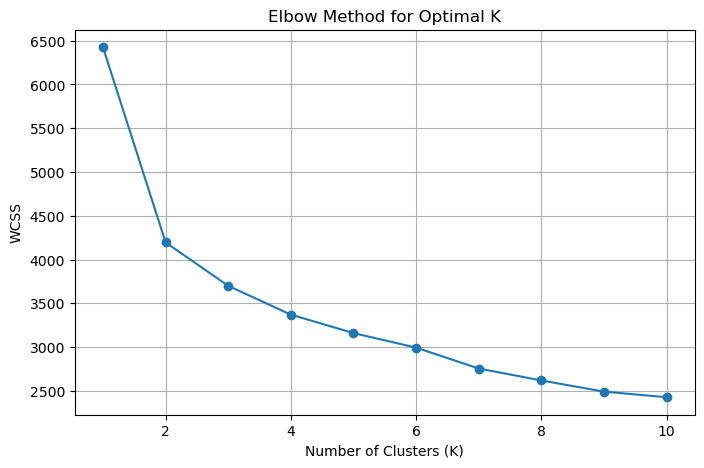

In [179]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Determine the optimal K using the Elbow Method
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [181]:
from sklearn.cluster import KMeans

# Train the K-Means model with K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Display first few rows with cluster assignments
print(df[['Cluster']].head())


   Cluster
1        2
2        2
3        2
4        0
5        2


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


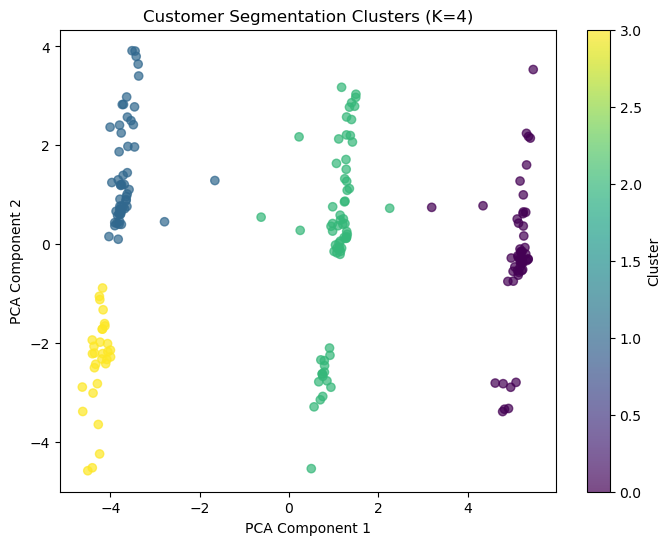

In [182]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce data to 2D for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['Cluster']))  # Exclude cluster column

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation Clusters (K=4)")
plt.colorbar(label="Cluster")
plt.show()


In [183]:
# Get the mean values per cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


              Age    Gender  Monthly Income    Region  Frequency of Shopping  \
Cluster                                                                        
0        8.941176  0.529412        1.980392  1.470588               0.882353   
1        0.054545  0.509091        2.181818  1.600000               0.745455   
2        4.955882  0.588235        2.000000  1.176471               0.485294   
3        0.000000  0.677419        2.354839  1.322581               0.290323   

         Average spending  Categories  Means of Payment  \
Cluster                                                   
0                3.019608    1.274510          2.686275   
1                3.109091    1.163636          2.727273   
2                3.470588    1.014706          2.661765   
3                3.193548    0.838710          2.709677   

         Entrolled on Jumia Prime or any loyalty program  \
Cluster                                                    
0                                           

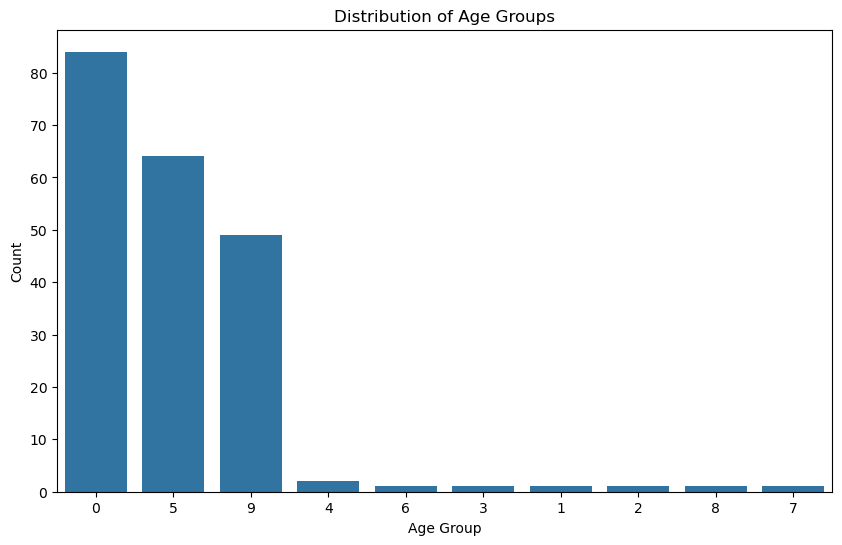

In [184]:
# Plot the distribution of age groups
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

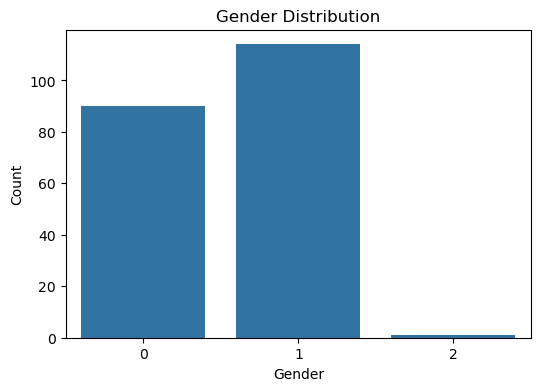

In [185]:
# Plot the distribution of gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

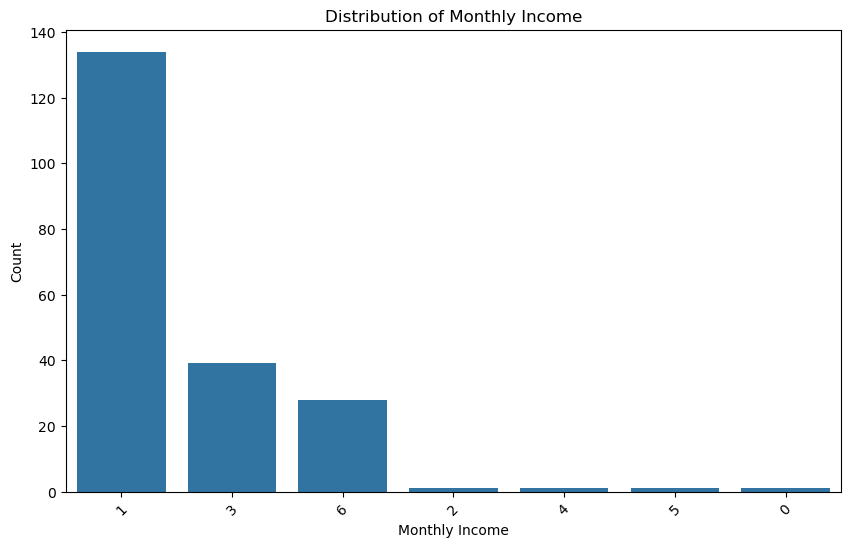

In [186]:
# Plot the distribution of monthly income
plt.figure(figsize=(10, 6))
sns.countplot(x='Monthly Income', data=df, order=df['Monthly Income'].value_counts().index)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

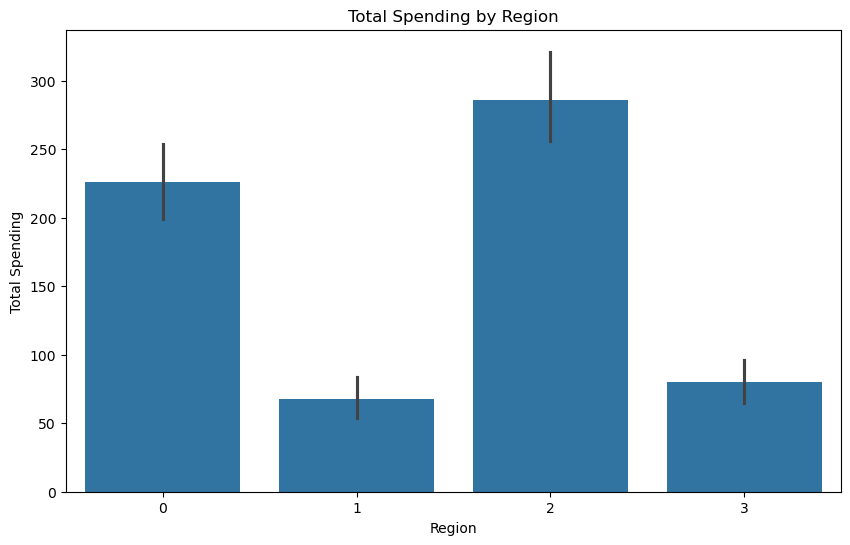

In [187]:
# Plot average spending by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Average spending', data=df, estimator=sum)
plt.title('Total Spending by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

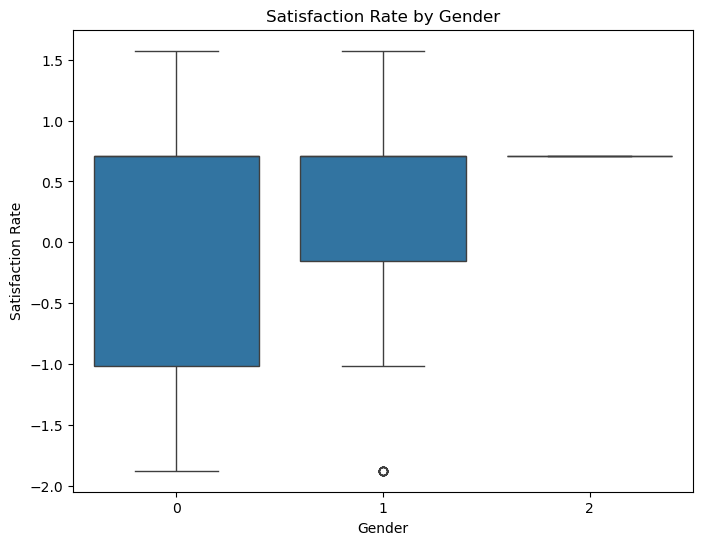

In [188]:
# Plot satisfaction rate by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Rate of Satisfaction', data=df)
plt.title('Satisfaction Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Satisfaction Rate')
plt.show()

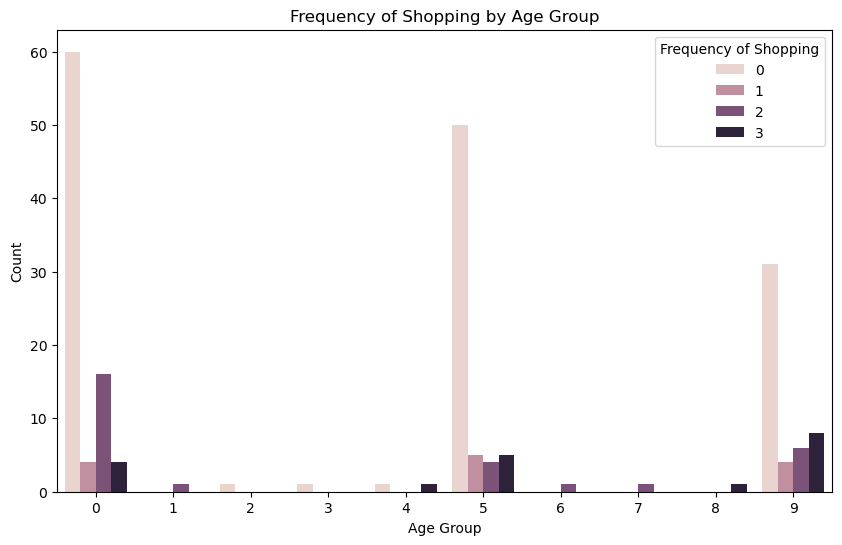

In [190]:
# Plot frequency of shopping by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Frequency of Shopping', data=df)
plt.title('Frequency of Shopping by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Frequency of Shopping')
plt.show()

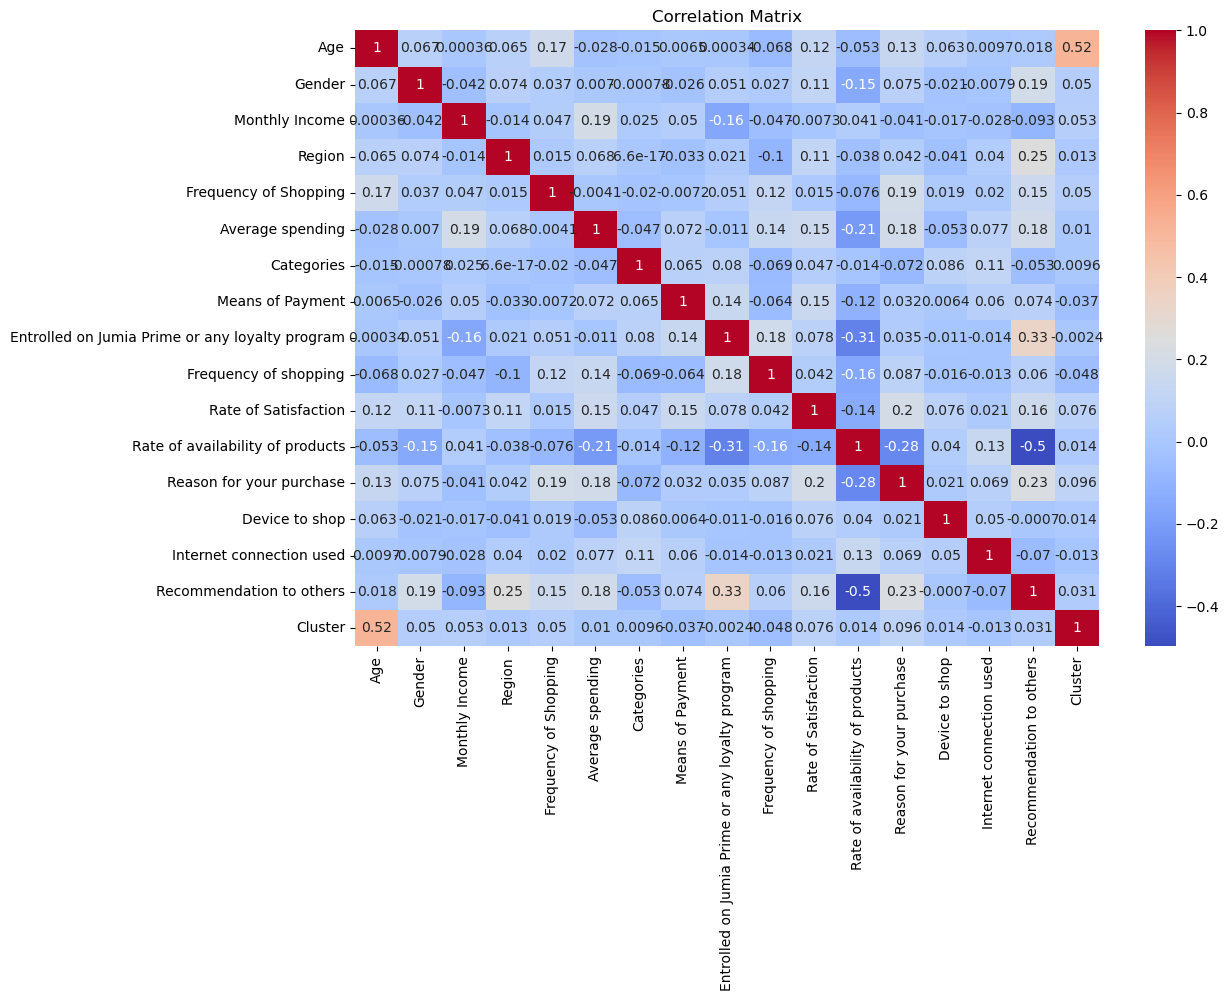

In [192]:
# Convert categorical variables to numerical for correlation
df_numeric = df.apply(lambda x: pd.factorize(x)[0])

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

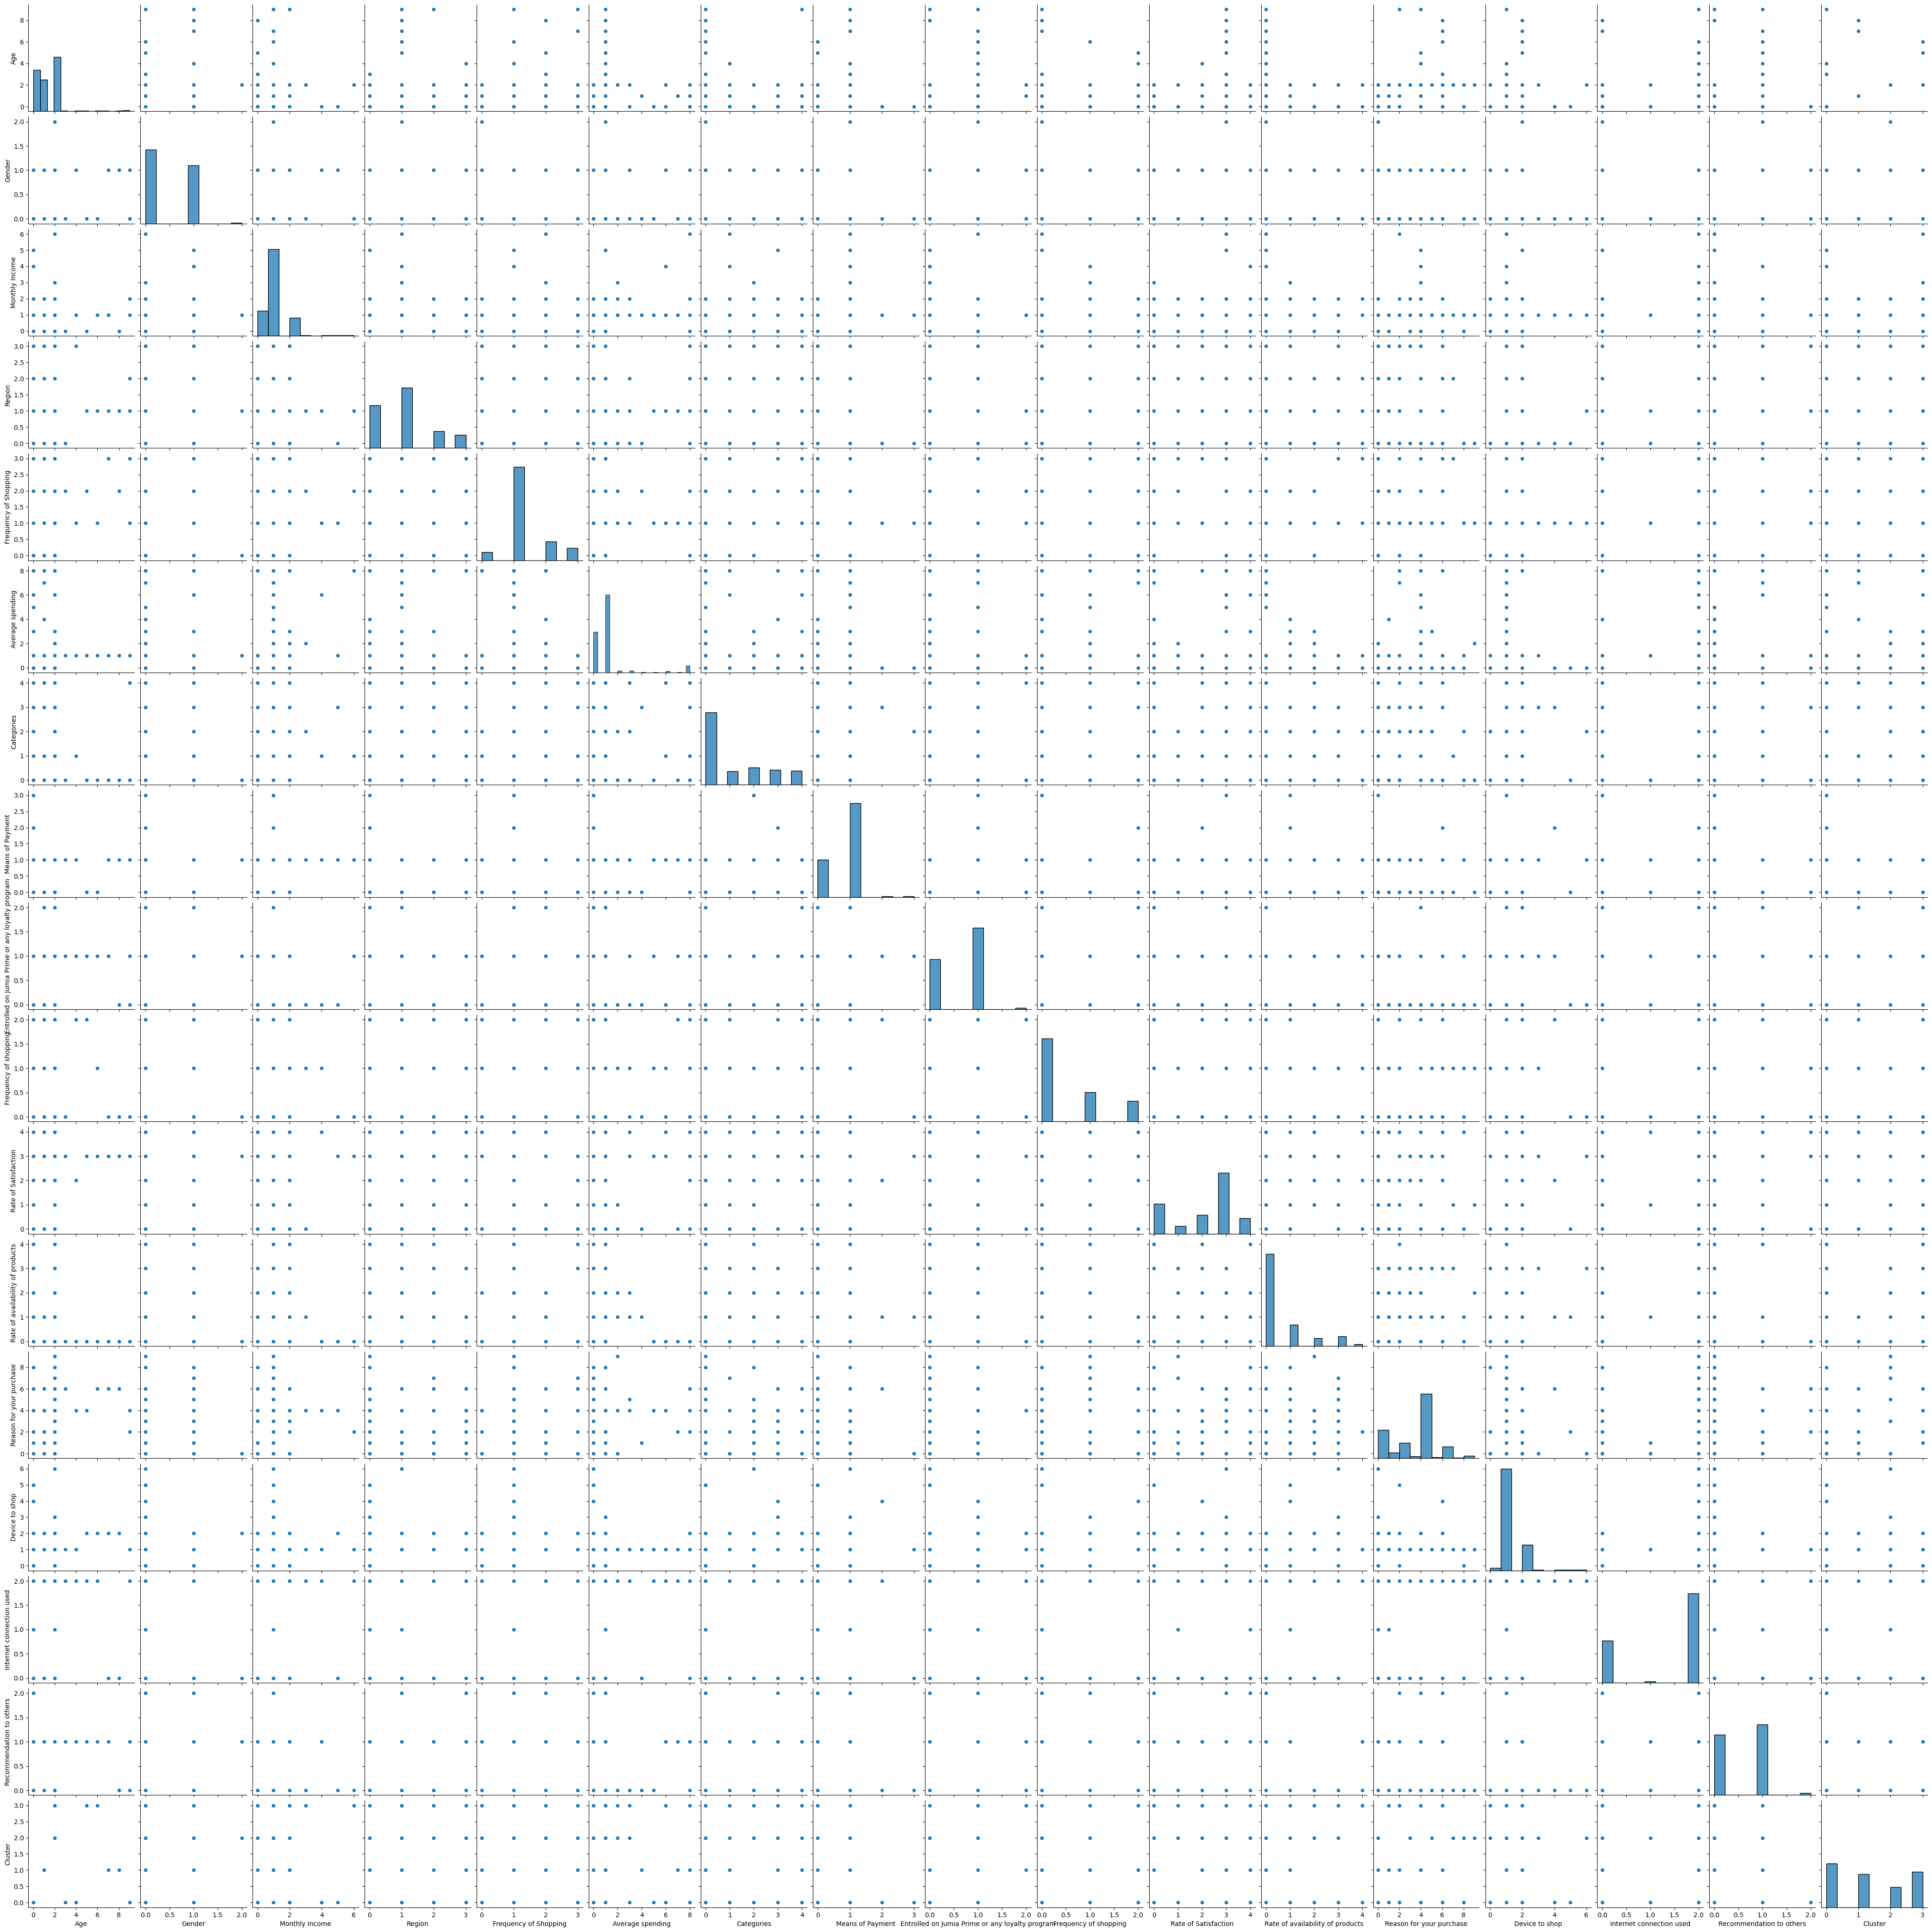

In [193]:
# Pairplot of numerical features
sns.pairplot(df_numeric)
plt.show()

In [194]:
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces



In [197]:
df.head()

,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others,Cluster
1,5,1,3,0,1,5,0,2,0,2,-0.151434,-0.531662,3,3,2,1,2
2,5,1,1,2,0,2,0,2,0,2,1.573235,0.603658,9,1,0,0,2
3,5,1,6,3,0,2,0,3,0,2,-0.151434,0.603658,8,1,1,1,2
4,9,1,1,0,0,5,3,2,0,2,-1.876104,0.603658,8,1,1,1,0
5,5,1,1,2,0,2,0,3,0,0,-0.151434,0.603658,3,1,1,1,2


# Step 2: Split Data into Training, Validation, and Test Sets
# Split the data into:

# Training (70%): For model training.

# Validation (15%): For hyperparameter tuning.

# Test (15%): For final evaluation.



In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dataset (modify as needed)
data = pd.read_csv("System Data.csv")  # Change filename if necessary

# Preprocessing (handle missing values, encoding, scaling)
data.dropna(inplace=True)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Split into training, validation, and test sets
train_data, test_data = train_test_split(data_scaled, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)  # 60% train, 20% val, 20% test

# Hyperparameter tuning using cross-validation
k_values = range(2, 11)
silhouette_scores = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(train_data)
    score = silhouette_score(val_data, kmeans.predict(val_data))
    silhouette_scores[k] = score

# Select best K
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best K: {best_k} with silhouette score: {silhouette_scores[best_k]}")

# Train final model with best K
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=300)
final_kmeans.fit(np.vstack((train_data, val_data)))

# Evaluate on test set
test_labels = final_kmeans.predict(test_data)
test_silhouette = silhouette_score(test_data, test_labels)
print(f"Test Silhouette Score: {test_silhouette}")


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Best K: 3 with silhouette score: 0.5139382774511997
Test Silhouette Score: 0.6421448791756019


In [206]:

# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Check for missing values
missing_values = df.isnull().sum()

# Display cleaned column names and missing values
df.columns, missing_values


(Index(['Age', 'Gender', 'Monthly Income', 'Region', 'Frequency of Shopping',
        'Average spending', 'Categories', 'Means of Payment',
        'Entrolled on Jumia Prime or any loyalty program',
        'Frequency of shopping', 'Rate of Satisfaction',
        'Rate of availability of products', 'Reason for your purchase',
        'Device to shop', 'Internet connection used',
        'Recommendation to others', 'Cluster'],
       dtype='object'),
 Age                                                0
 Gender                                             0
 Monthly Income                                     0
 Region                                             0
 Frequency of Shopping                              0
 Average spending                                   0
 Categories                                         0
 Means of Payment                                   0
 Entrolled on Jumia Prime or any loyalty program    0
 Frequency of shopping                              0
 Rate 

In [208]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoders = {}

# Encode all categorical columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for future inverse transformations

# Display the first few rows of the encoded dataset
df.head()



,Age,Gender,Monthly Income,Region,Frequency of Shopping,Average spending,Categories,Means of Payment,Entrolled on Jumia Prime or any loyalty program,Frequency of shopping,Rate of Satisfaction,Rate of availability of products,Reason for your purchase,Device to shop,Internet connection used,Recommendation to others,Cluster
1,5,1,3,0,1,5,0,2,0,2,-0.151434,-0.531662,3,3,2,1,2
2,5,1,1,2,0,2,0,2,0,2,1.573235,0.603658,9,1,0,0,2
3,5,1,6,3,0,2,0,3,0,2,-0.151434,0.603658,8,1,1,1,2
4,9,1,1,0,0,5,3,2,0,2,-1.876104,0.603658,8,1,1,1,0
5,5,1,1,2,0,2,0,3,0,0,-0.151434,0.603658,3,1,1,1,2


In [218]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Define features (X) and target (y)
X = df.drop(columns=["Recommendation to others"])  # Features
y = df["Recommendation to others"]  # Target variable

# Split data into training (70%) and temporary set (30%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary set into validation (15%) and test (15%) WITHOUT stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel="rbf")
}

# Train models and evaluate using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Perform hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Best Model Validation Accuracy:", accuracy_score(y_val, y_pred))

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
print("Best Model Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training set: (143, 16), Validation set: (31, 16), Test set: (31, 16)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Accuracy: 0.7268 ± 0.0530


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Accuracy: 0.7424 ± 0.0646


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting Accuracy: 0.6995 ± 0.0336
SVM Accuracy: 0.7064 ± 0.0459


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Model Validation Accuracy: 0.8387096774193549
Best Model Test Accuracy: 0.8387096774193549


In [220]:
cv_strategy = min(3, len(set(y_train)))  # Ensures the number of folds is at most 3 or unique class count

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring="accuracy")
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Logistic Regression Accuracy: 0.7139 ± 0.1082


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Random Forest Accuracy: 0.7490 ± 0.0766


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Gradient Boosting Accuracy: 0.6857 ± 0.0425
SVM Accuracy: 0.7206 ± 0.0332


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [222]:
from collections import Counter
from sklearn.model_selection import cross_val_score

# Determine the minimum number of samples in any class
min_samples_per_class = min(Counter(y_train).values())

# Set cv to the minimum of 3 or available samples per class
cv_strategy = min(3, min_samples_per_class)

# Train & evaluate models with adjusted cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv_strategy, scoring="accuracy")
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Accuracy: 0.6429 ± 0.0654
Random Forest Accuracy: 0.7554 ± 0.0193
Gradient Boosting Accuracy: 0.6994 ± 0.0189
SVM Accuracy: 0.7133 ± 0.0050


In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv_strategy, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Accuracy:", grid_search.best_score_)


Best Random Forest Accuracy: 0.7833528951486698


In [226]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ['sqrt', 'log2'],
    "bootstrap": [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv_strategy, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Random Forest Accuracy:", grid_search.best_score_)


Best Random Forest Accuracy: 0.7974374021909233


In [244]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# Define features (X) and target (y)
X = df.drop(columns=["Recommendation to others"])  # Features
y = df["Recommendation to others"]  # Target variable

# Split data into training (70%) and temporary set (30%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split temporary set into validation (15%) and test (15%) WITHOUT stratification
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display dataset shapes
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel="rbf")
}

# Train models and evaluate using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Perform hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
print("Best Model Validation Accuracy:", accuracy_score(y_val, y_pred))

# Final evaluation on the test set
y_test_pred = best_model.predict(X_test)
print("Best Model Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training set: (143, 16), Validation set: (31, 16), Test set: (31, 16)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Accuracy: 0.7268 ± 0.0530


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Random Forest Accuracy: 0.7631 ± 0.0524


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting Accuracy: 0.7135 ± 0.0383
SVM Accuracy: 0.7064 ± 0.0459


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Model Validation Accuracy: 0.9032258064516129
Best Model Test Accuracy: 0.8387096774193549


In [245]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm = SVC(kernel='rbf', C=1)
scores = cross_val_score(svm, X_train, y_train, cv=skf)

print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation scores: [0.62068966 0.75862069 0.68965517 0.82142857 0.78571429]
Mean accuracy: 0.7352 ± 0.0717


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [250]:
# Drop low-importance/correlated features
X_train_selected = X_train.drop(columns=['Frequency of shopping', 'Rate of availability of products'])  # Replace with actual names
X_test_selected = X_test.drop(columns=['Frequency of shopping', 'Rate of availability of products'])

# Train SVM again
svm = SVC(kernel='rbf', C=10, gamma='scale')  # Use best parameters found earlier
svm.fit(X_train_selected, y_train)

# Evaluate performance
accuracy = svm.score(X_test_selected, y_test)
print(f"Final SVM Accuracy: {accuracy:.4f}")


Final SVM Accuracy: 0.7097


Final Test Accuracy: 0.7097
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.74      0.78      0.76        18

    accuracy                           0.71        31
   macro avg       0.70      0.70      0.70        31
weighted avg       0.71      0.71      0.71        31



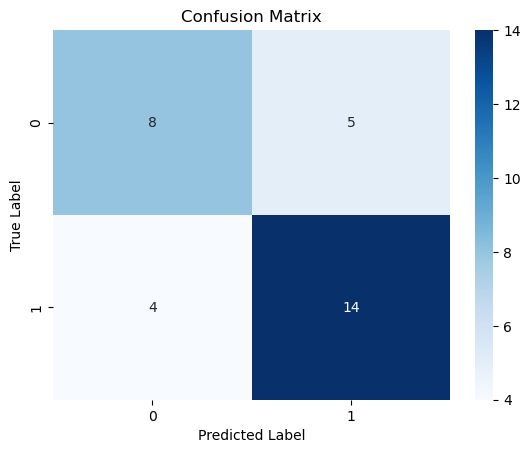

In [252]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions on Test Set
y_pred = svm.predict(X_test_selected)

# Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Final Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=True, yticklabels=True)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  0%|          | 0/31 [00:00<?, ?it/s]

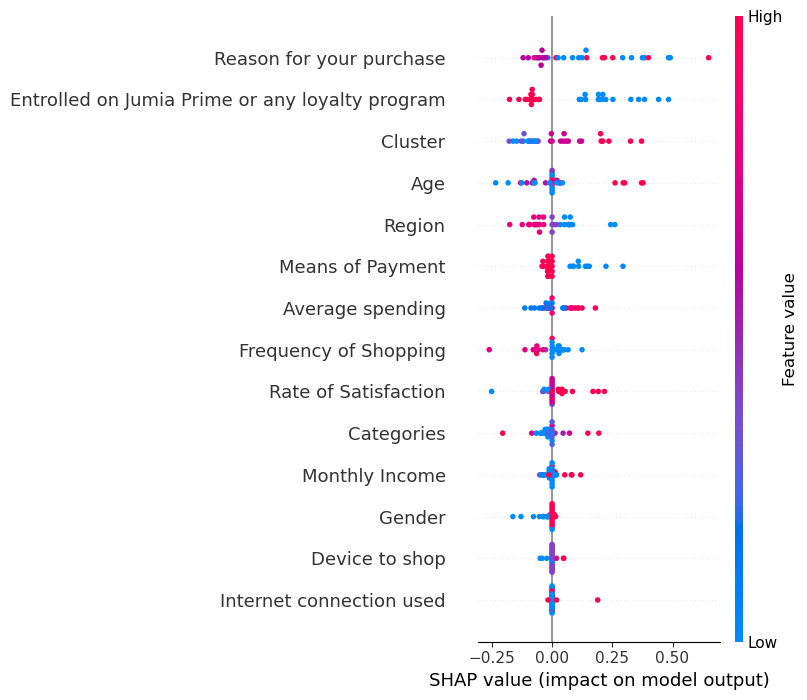

In [260]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create KernelExplainer
explainer = shap.KernelExplainer(svm.predict, shap.kmeans(X_train_selected, 10))  # Approximate model behavior
shap_values = explainer.shap_values(X_test_selected)

# Summary Plot
shap.summary_plot(shap_values, X_test_selected)


In [266]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(svm, X_train_selected, y_train, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Scores: [0.65517241 0.75862069 0.51724138 0.57142857 0.60714286]
Mean Cross-Validation Accuracy: 0.6219


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


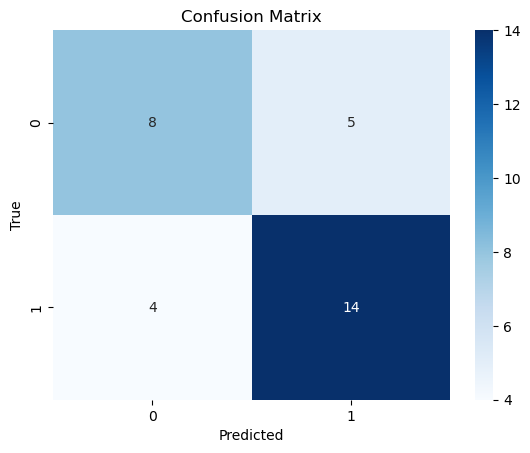

In [268]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = svm.predict(X_test_selected)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [270]:
import joblib

# Save the model and scaler (for preprocessing)
joblib.dump(svm, 'svm_model.pkl')  # Save model
joblib.dump(scaler, 'scaler.pkl')  # Save scaler (if used)


['scaler.pkl']

In [284]:
import joblib

try:
    # Save the trained model
    joblib.dump(svm, 'svm_model.pkl')  # Save the model
    
    # Save the scaler used during training
    joblib.dump(scaler, 'scaler.pkl')  # Save the scaler
    print("Model and scaler saved successfully.")
except Exception as e:
    print(f"Error saving model or scaler: {e}")


Model and scaler saved successfully.
